# Let's begin building our models!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('heart_disease_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,296.0,54.500000,9.035898,29.0,48.0,56.0,61.00,77.0
Sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
Chest_Pain,296.0,3.158784,0.966449,1.0,3.0,3.0,4.00,4.0
Resting_Blood_Pressure,296.0,131.750000,17.766232,94.0,120.0,130.0,140.00,200.0
Colestrol,296.0,246.280405,48.701920,126.0,211.0,242.5,275.25,417.0
Fasting_Blood_Sugar,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
Rest_ECG,296.0,0.993243,0.994879,0.0,0.0,1.0,2.00,2.0
MAX_Heart_Rate,296.0,149.564189,22.972406,71.0,133.0,152.5,166.00,202.0
Exercised_Induced_Angina,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
ST_Depression,296.0,1.053716,1.167666,0.0,0.0,0.8,1.65,6.2


In [7]:
df.dtypes

Age                           int64
Sex                           int64
Chest_Pain                    int64
Resting_Blood_Pressure        int64
Colestrol                     int64
Fasting_Blood_Sugar           int64
Rest_ECG                      int64
MAX_Heart_Rate                int64
Exercised_Induced_Angina      int64
ST_Depression               float64
Slope                         int64
Major_Vessels                 int64
Thalessemia                   int64
Target                        int64
dtype: object

In [8]:
q_mark = df.loc[df['Thalessemia']== '?']
print(q_mark)

Empty DataFrame
Columns: [Age, Sex, Chest_Pain, Resting_Blood_Pressure, Colestrol, Fasting_Blood_Sugar, Rest_ECG, MAX_Heart_Rate, Exercised_Induced_Angina, ST_Depression, Slope, Major_Vessels, Thalessemia, Target]
Index: []


In [9]:
df.drop(df[df['Major_Vessels'] == '?'].index, inplace = True)

In [10]:
df.drop(df[df['Thalessemia'] == '?'].index, inplace = True)

In [11]:
df['Major_Vessels'] = df['Major_Vessels'].astype('int')

In [12]:
df['Thalessemia'] = df['Thalessemia'].astype('int')

# First we'll use KNN

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('Target',axis=1))


StandardScaler()

In [18]:
scaled_features = scaler.transform(df.drop('Target',axis=1))

In [19]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [20]:
df_feat.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia
0,0.942285,0.687486,-2.237510,0.747060,-0.273149,2.425638,1.013652,0.019003,-0.698167,1.069137,2.264087,-0.723832,0.660262
1,1.385714,0.687486,0.871893,1.592788,0.816946,-0.412263,1.013652,-1.812373,1.432322,0.382849,0.645320,2.473994,-0.890830
2,1.385714,0.687486,0.871893,-0.662487,-0.355421,-0.412263,1.013652,-0.896685,1.432322,1.326494,0.645320,1.408052,1.177293
3,-1.939999,0.687486,-0.164574,-0.098668,0.076504,-0.412263,-1.000046,1.632359,-0.698167,2.098568,2.264087,-0.723832,-0.890830
4,-1.496571,-1.454575,-1.201042,-0.098668,-0.869617,-0.412263,1.013652,0.978296,-0.698167,0.297063,-0.973448,-0.723832,-0.890830


In [21]:
X = df_feat
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
error_rate = []

for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

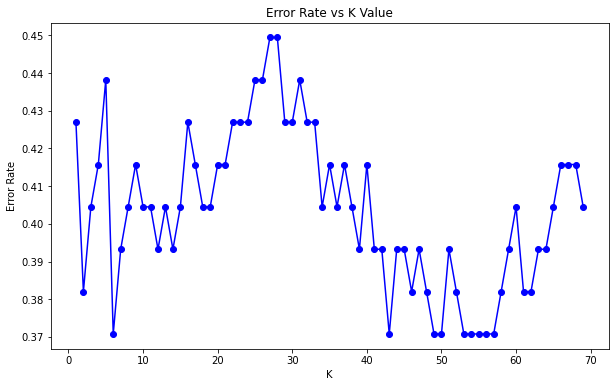

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- We'll choose a k of 40

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
from sklearn.metrics import multilabel_confusion_matrix

In [27]:
from sklearn.metrics import balanced_accuracy_score

In [28]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(multilabel_confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))
print(balanced_accuracy_score(y_test,pred))

[[[28 14]
  [ 3 44]]

 [[56 14]
  [13  6]]

 [[72  2]
  [12  3]]

 [[78  3]
  [ 8  0]]

 [[86  3]
  [ 0  0]]]


              precision    recall  f1-score   support

           0       0.76      0.94      0.84        47
           1       0.30      0.32      0.31        19
           2       0.60      0.20      0.30        15
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         0

    accuracy                           0.60        89
   macro avg       0.33      0.29      0.29        89
weighted avg       0.57      0.60      0.56        89

0.362989921612542


/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [29]:
df.to_csv('heart_disease_cleaned.csv')